# Problem Set 4

Due in your git fork by 11:59pm Pacific time on Wednesday, November 15th.

All problems have equal weight.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
print(sys.version)

## Problem 1

**Multi-dimension MC integration.**
We discussed at length 1-dimensional MC integration, and we talked about how MC techniques become important for multi-dimensional integrals. Let's see that now by doing the problem in section 5.17 of your textbook. We want to evaluate the ten-dimensional integral

$$I=\int_0^1 dx_1\int_0^1 dx_2...\int_0^1 dx_{10} (x_1+x_2+....+x_{10})^2$$

and we will compare the result with the analytic result $\frac{155}{6}$ and with a trapezoid rule integration, in the following problem. 

First, a quick digression: this seems a good opportunity to introduce sympy for symbolic manipulation.

In [1]:
# Let's use sympy to verify that funny 155/6 claimed by your textbook:
from sympy import *
init_printing(use_unicode=True)
x1,x2,x3,x4,x5,x6,x7,x8,x9,x10=symbols('x1 x2 x3 x4 x5 x6 x7 x8 x9 x10') # tell sympy about the symbols we want to use
integrate((x1+x2+x3+x4+x5+x6+x7+x8+x9+x10)*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10),x1,x2,x3,x4,x5,x6,x7,x8,x9,x10)

In [2]:
# good to know. let's put in the limits now:
exact=integrate((x1+x2+x3+x4+x5+x6+x7+x8+x9+x10)*(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10),
          (x1,0,1),(x2,0,1),(x3,0,1),(x4,0,1),(x5,0,1),(x6,0,1),(x7,0,1),
          (x8,0,1),(x9,0,1),(x10,0,1))
print(exact)

155/6


Confirmed -- exactly as stated. BTW, sympy also knows how to integrate to infinity (oo and -oo), and it can also take derivatives sympbolically as well as do all that algebra for us. It can even output a result in LaTeX. 

Back to our problem now:

a) implement a MC integration of $I$ using $N$ uniformly generated random points (no need to do importance sampling in this problem). Do this for $N=2^p$, where $p=5, 6, 7, ...18$ (so your largest $N$ is 262144). Plot the absolute value of the error vs $\sqrt{N}$ on a log-log plot. There will be statistical fluctuations, so try it a few times to ensure you see the overall behavior. (Your book suggests averaging 16 results per value of $N$ -- feel free to do that, but it's not required here.)

In [627]:
import numpy as np
import matplotlib.pyplot as plt
import random 

def function(xarray):
    sum = 0
#     print(isinstance(xarray,np.ndarray))
#     if type(xarray) != list  and isinstance(xarray,np.ndarray) == False:
    if type(xarray) != list  and type(xarray) !=  np.ndarray:
        raise Exception("must be a list, try again noob")
    for i in range(len(xarray)):
        for j in range(len(xarray)):
            sum += xarray[i]*xarray[j]
    return sum

def testfunc(xarray):
#     sum = 0
    sum = np.sum(xarray)    # adds up the terms 
    return sum**2           # squares the terms and returns them

def monte(N, f, D=10):
    numsgened=0             # counter for testing terms gened 
    sum = 0 
    sum2 = 0 
    x = np.zeros(D)         # creates array of zeros with length D
    for j in range(int(N/D)):   # iterates over N/D terms, set to int 
        for i in range(D):      # iterates over D
            x[i] = random.random()      # generates a random value for each dimension
            numsgened +=1
#         print(type(x))
#         print(x)
        sum += function(x)              # calculates the value of the function and adds all values
#         sum2 += function(x)**2
    sum = sum/(int(N/D))                # takes average over all terms calced                      
#     err = np.sqrt((sum2/N - sum**2)/N)
    err = 155/6 - sum                   # calculates absolute err
#     print(numsgened)
    return sum, err
        


    
for i in range(5,19):
    aveans, aveerr = 0,0
    for j in range(16):
        cur = monte(2**i,testfunc) #calculates the values for 2**i N terms 
        aveans += cur[0]
        aveerr += cur[1]
    print(f"for N = {2**i} monte = {aveans/16:.6}", u"\u00B1",f"{aveerr/16:.6}\n") #prints average results after 16 runs 
     
    

# for i in range(5,19):
#     ans, err = monte(2**i,testfunc)
#     ans = "{:2.6g}".format(ans)
#     err = "{:2.6g}".format(err)
#     print(f"for N = {2**i} monte = {ans}", u"\u00B1",f"{err}\n")
        

for N = 32 monte = 21.3302 ± 4.50313

for N = 64 monte = 24.3027 ± 1.5306

for N = 128 monte = 23.6042 ± 2.2291

for N = 256 monte = 24.6351 ± 1.19823

for N = 512 monte = 25.1434 ± 0.689886

for N = 1024 monte = 25.4999 ± 0.3334

for N = 2048 monte = 25.6169 ± 0.216428

for N = 4096 monte = 25.9503 ± -0.116976

for N = 8192 monte = 25.9196 ± -0.0862966

for N = 16384 monte = 25.8939 ± -0.0605828

for N = 32768 monte = 25.8469 ± -0.0136106

for N = 65536 monte = 25.8429 ± -0.00953315

for N = 131072 monte = 25.8604 ± -0.027051

for N = 262144 monte = 25.8249 ± 0.00844911



In [628]:
vals = np.zeros(14)
for i in range(5,19):
    ave = 0
    for j in range(16):
        ave =+ monte(2**i,testfunc)[1]
    vals[i-5] = ave/16         # finds average err after 16 runs

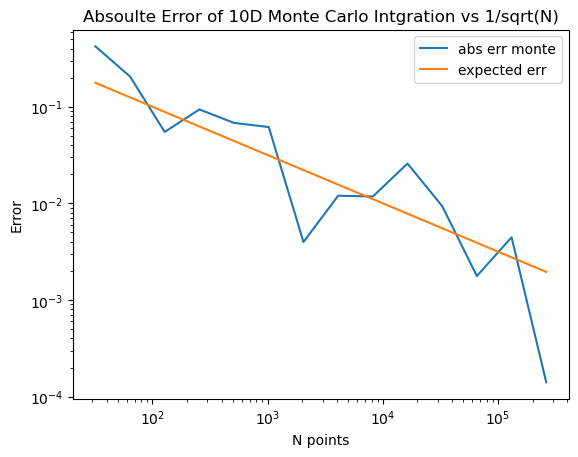

In [629]:
datapoints = np.zeros(14)
expectederr = np.zeros(14)
for i in range(5,19):
    expectederr[i-5] = 1/(2**(i/2))            #calcs expected err 
    datapoints[i-5] = 2**i

vals = abs(vals)    

# plt.plot(datapoints[3:],expectederr[3:], label="1/sqrt(N)")
# plt.plot(datapoints[3:],vals[3:],label="err from monte carlo")
# plt.legend()
# plt.show()

# dif = 155/6 - vals
# print(expectederr)
# print(vals)


plt.plot(datapoints,vals, label="abs err monte")
plt.plot(datapoints,expectederr, label="expected err")
plt.yscale("log")
plt.xscale("log")
plt.xlabel("N points")
plt.ylabel("Error")
plt.title("Absoulte Error of 10D Monte Carlo Intgration vs 1/sqrt(N)")
plt.legend()
plt.show()

b) now let's compare with a Trapezoid integration.  Distribute the $N$ points over an evenly spaced mesh spanning the $D$-dimensional space, so the integration steps are necessarily coarse. If, for example, there were 100 points in each dimension, we would be required to sum $100^D$ terms to perform a standard numerical integration. Not possible for $D=10$.

We will therefore investigate $D=7$. If we limit $N$ to around the size of the largest value from part (a) and distribute those points over 7 dimensions, we'll have at most 6 points for each dimension (for a total of $279,936$ points in this part of the problem). As the integration limits are 0 to 1, $h=0.2$, which is relatively coarse for a one-dimensional integral.  Note:
  - You might find it helpful first to think about moving from 1-dim to 2-dim to 3-dim integrals as you generalize your calculation to 10 dimensions:
    - You'll need nested loops, one for each integration variable.
    - For a D-dimensional integral, there are D weights to multiply together at each step.

In [667]:

def wtrap(i,N,h):   #weight function if min is 1 and max is N
    if i==1 or i ==N:
        return h/2
#     print(i,N)
    return h

def wtrap2(i,N,h):   # weight function if min is 0 and max in N-1
    if i==0 or i ==N-1:
        return h/2
    return h


def g(x1,x2,x3,x4,x5,x6,x7):    # 7d function for calc
    return (x1+x2+x3+x4+x5+x6+x7)**2

############################################################################################################

def trapz2(N,D,function):
    sum = 0
    n = N**(1/D)        # finds num of points to put in each dim 
    if int(n +.000000001) != int(n):   #checks for a rounding point error that may occur with perfect squares
        n +=.000000001                 # fixes rounding point err
    n = int(n)                         
    h=1/(n-1)                          # calcs spacing of points
    for i1 in range(1,n+1):            # sets start at 1 and end at N
        x1 = (i1-1)*h                  # gens points
        for i2 in range(1,n+1):
            x2 = (i2-1)*h
            for i3 in range(1,n+1):
                x3 = (i3-1)*h
                for i4 in range(1,n+1):
                    x4 = (i4-1)*h
                    for i5 in range(1,n+1):
                        x5 = (i5-1)*h
                        for i6 in range(1,n+1):
                            x6 = (i6-1)*h
                            for i7 in range(1,n+1):
                                x7 = (i7-1)*h        # line below calcs value of function and weights before multiplying them together
                                sum += wtrap(i1,n,h)*wtrap(i2,n,h)*wtrap(i3,n,h)*wtrap(i4,n,h)*wtrap(i5,n,h)*wtrap(i6,n,h)*wtrap(i7,n,h)*function(x1,x2,x3,x4,x5,x6,x7)
    return sum

def trapz3(N,D,function):
    count = 0
    sum =0 
    n = N**(1/D)                     # finds num of points to put in each dim 
    if int(n +.000000001) != int(n): #checks for a rounding point error that may occur with perfect squares
        n +=.000000001               # fixes rounding point err
    n = int(n)
    h=1/(n-1)                        #calcs spacing 
    x = np.zeros(n)                  #gens emptry array for the points
    for i in range(1,n+1):
        x[i-1] = (i-1)*h             #calcs points assuming all go from 0 to 1 
    c = np.zeros(D)                  #creates a D length array of 0's
    xcur = np.zeros(D)               #creates a D length array of 0's
    while c[-1] < len(x):            #goes for length until last counter is filled
        termn = 1                    #needs the term that gets multiplied to be reset and set to 1
        for i in range(D):           
            xcur[i] = x[int(c[i])]   #finds x cur for each dim checking a D dimensional counter
        for i in range(len(c)):
            termn *= wtrap2(c[i],n,h)  #finds weights by checking D dimensional counter
        termn *=function(xcur)       # calculates the function and multiplies it onto termn
        c[0]+=1                      #increases count by 1 
        sum +=termn                  #adds current term to total
        if np.sum(c)==D*(len(x)-1)+1:   # if counter is full breaks out of loop
            break
        for i in range(len(c)):      
            if c[i] == len(x):       # if counter slot is full, emptys and adds 1 to next slot
                c[i]=0
                c[i+1]+=1
    return sum


print(f"trapazode integral comes out to {trapz3(279936,7,testfunc):.11} with method 1")
print(f"trapazode integral comes out to {trapz2(279936,7,g):.11} with method 2")

# print(trapz(279936,7,function1b))
        

trapazode integral comes out to 12.88 with method 1
trapazode integral comes out to 12.88 with method 2


c) Now evalute the integral via MC for the same $N=6^D$ and $D=7$ as in part (b).

In [604]:
print(monte(279936, testfunc, 7)[0])

12.835501676333873


d) Finally, use sympy to tell you the analytic answer and compare your MC and Trapezoid results. Remember, we're just at $D=7$ here. (Imagine extrapolating your Trapezoid integration to $D=10$ -- with just 6 points per dimension, that would be more than 60 million points in the 10-dimensional volume.)

In [612]:
exact=integrate((x1+x2+x3+x4+x5+x6+x7)*(x1+x2+x3+x4+x5+x6+x7),
          (x1,0,1),(x2,0,1),(x3,0,1),(x4,0,1),(x5,0,1),(x6,0,1),(x7,0,1))
print(f"The exact answer is {exact}")

print(f"dif between trapz and exact = {abs(exact - trapz2(279936,7,g)):.6}")
# print(f"dif between monte and exact = {abs(exact - monte(279936, function, 7)[0])}")
print(f"dif between monte and exact = {abs(exact - monte(279936, testfunc, 7)[0]):.6}")

The exact answer is 77/6
dif between trapz and exact = 0.0466667
dif between monte and exact = 0.00272540


Higher dimensions would show even more favorable results for the MC method. At some point, the Trapezoid method becomes impractical.

## Problem 2

This is an exercise in applying the bisection root-finding technique to a physics problem. In Quantum Mechanics, when solving the finite well problem, the spatially even bound states were found to be associated with the solutions to a transcendental equation:

$$\tan(z)=\sqrt{(z_0/z)^2-1}$$

where $z_0$ is a dimensionless parameter related to the depth and width of the well (smaller $z_0$ is a shallower and/or narrower well). Let's solve the problem for $z_0=8$.

A quick sketch of the functions on the left and right side of the equation above will convince you there are only three bound states of this type (the two sides are equal where their curves cross, and those are the solutions -- you can also see Figure 2.18 in Griffiths). As the $\tan$ function behaves badly around $m\pi/2$ ($m=1, 3, 5, ...$) you'll have to take some care to find the three values of $z$ that represent the three bound states.

Find those three values of $z$ numerically with precision $10^{-3}$. Check that your results roughly match your expectation from your sketch.

In [528]:
def func2a(z):
    z0 = 8
    return np.sqrt((z0/z)**2 -1)


def bisection2(f1,f2,a,b,eps,Nmax=1000,roots=1):
    if type(a) != np.ndarray and type(a) != list:   #puts nonlist bounds into lists
        a = [a]
    if type(b) != np.ndarray and type(b) != list:
        b = [b]
    count = 0
    found = np.zeros(roots)                        #makes array for expected num of lists
    for i in range(roots):                         #runs for each expected root
        for j in range(Nmax):
            m = list(np.array(a)+np.array(b))      #finds middle point of roots
            m[i] = m[i]/2
            if (f1(b[i])-f2(b[i]))*(f1(m[i])-f2(m[i]))>0:      # checks sign of difference between 2 functions
                b[i] = m[i]
            else:
#                 print(a[i], m[i])
                a[i] = m[i]
#                 print(a[i], m[i],3) #
            if abs(b[i]-a[i])<eps:
                break
            count+=1
        found[i]=m[i]
    return found
        
low = np.array([0,3.1,6])    #check for 0,3,6
upper = np.array([1.5,4.7,7.5])
    
# print(bisection2(func2a,np.tan,low,upper,10**(-3),roots=3))
r1,r2,r3 = bisection2(func2a,np.tan,low,upper,10**(-3),roots=3)

# print(bisection2(func2a,np.tan,0,1.5,10**(-3),roots=1))


print(f"roots found at x = {r1:.6},", f"{r2:.6}," ,"%1.6g" % r3)


roots found at x = 1.39526, 4.16484, 6.8313


## Problem 3

Try using scipy's curve_fit. In the next cell you can find the toy (fake) data from Table 7.1 of your textbook, with errors adjusted to be a bit more interesting. 

a) Use these data and fit the Breit-Wigner function (use equation 7.64 or 7.21 in your textbook):

$$ f(E)=\frac{f_r}{(E-E_r)^2+\Gamma^2/4}$$

Plot the data, the errors, and the resulting fitted function. Be sure to show units on your axes (Energy in MeV, cross-section in *mb*).  


In [635]:
# your code and results here
import scipy.optimize as sop
E = np.array([0., 25., 50., 75., 100., 125., 150., 175., 200.])    # input
y = np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])
err=np.array([.934, 1.79, 4.15, 8.55, 5.15, 2.15, 1.08, 6.29, 4.14 ])

### Solution

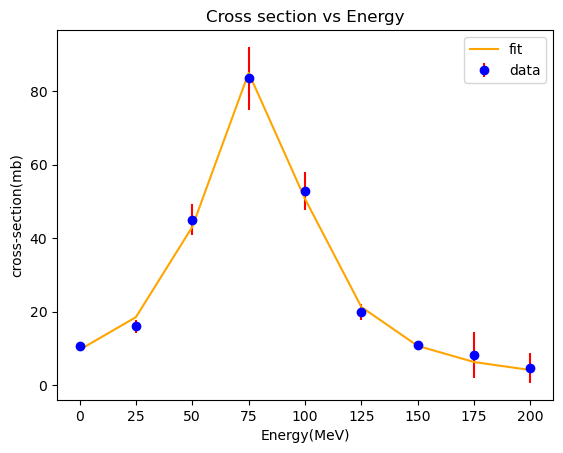

In [677]:
def func3(E,fg,eg,gg):
    return fg/((E-eg)**2+gg**2/4)

yg = np.zeros(len(y))


# fg, eg, gg = 1,1,1
params, cov = sop.curve_fit(func3, E, y, sigma=err)     #runs curve fit
# print(yg)

# print(params)



plt.errorbar(E,y,yerr=err, c="blue", ecolor="red" , fmt="o", label="data", barsabove=False)
# plt.scatter(E,y, label="data",c="blue")
plt.plot(E,func3(E,*params),label="fit", c="orange")
# plt.plot(E,func3(E,65153,7919,-8941),label="fit", c="orange")

plt.xlabel("Energy(MeV)")
plt.ylabel("cross-section(mb)")
plt.title("Cross section vs Energy")
plt.legend()
plt.show()



b) Print the resulting fit parameters ($E_r, f_r, \Gamma$) along with their errors, well formatted. Also print the covariance matrix and comment on the sizes of the off-diagonal elements.

### Solution

In [652]:
from tabulate import tabulate

# print(params, cov)

fr = params[0]
Er = params[1]
gamma = params[2]
err4b = np.sqrt(np.diag(cov))

print(tabulate([["Paramerter", "Value", "Error"],["fr",params[0],err4b[0]],["Er",params[1],err4b[1]],["Gamma",params[2],err4b[2]]],tablefmt="fancy_grid"))

# print(np.sqrt(np.diag(cov)))

# print(cov)

print("\ncov =")
print(tabulate([[cov[0][0],cov[0][1],cov[0][2]],[cov[1][0],cov[1][1],cov[1][2]],[cov[2][0],cov[2][1],cov[2][2]]],tablefmt="fancy_grid"))

╒════════════╤════════════════════╤════════════════════╕
│ Paramerter │ Value              │ Error              │
├────────────┼────────────────────┼────────────────────┤
│ fr         │ 64331.65382284179  │ 3322.9672153023957 │
├────────────┼────────────────────┼────────────────────┤
│ Er         │ 77.2491968952416   │ 1.0863129714163917 │
├────────────┼────────────────────┼────────────────────┤
│ Gamma      │ 54.837073601302336 │ 2.873283810386361  │
╘════════════╧════════════════════╧════════════════════╛

cov =
╒════════════════╤═════════════╤══════════════╕
│    1.10421e+07 │ 163.896     │ 7649.43      │
├────────────────┼─────────────┼──────────────┤
│  163.896       │   1.18008   │    0.0368752 │
├────────────────┼─────────────┼──────────────┤
│ 7649.43        │   0.0368752 │    8.25576   │
╘════════════════╧═════════════╧══════════════╛


The off diagonal elements are symetric about the center, the value in the top middle is is rather larger but the cornors are much large. The middle side terms are very small.

c) Assess the quality of the fit by calculating the reduced $\chi^2$. Is it a reasonable fit? 

### Solution

In [638]:
r = y - func3(E, *params)
chisq = sum((r/err)**2)
print(f"chisq = {chisq}")
print(f"reduced chisq = {chisq/3}")

chisq = 4.063730969876401
reduced chisq = 1.3545769899588003


While not a perfect fit that we would hope for, with $\chi^2$ = 1 but this does seem to be a reasonable fit as we are still over 1 but under 2.